In [1]:
setwd('/import/DB/workdir/cd40/')

In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
data1 = readRDS('/import/194.data/data/singledata/heart2/macro.rds')

In [4]:
table(data1$orig.ident)


  MI14d    MI3d    MI7d control 
   1088    6617    3196     576 

In [5]:
Idents(data1) = 'orig.ident'

In [6]:
MI3d1 = subset(data1,idents = 'MI3d')

In [7]:
data2 = readRDS('./meyloid.rds')

In [8]:
table(data2$orig.ident)


KO3d WT3d 
6816 6149 

In [9]:
single.ob=merge(MI3d1,data2)
immune.combined = single.ob

In [10]:
DefaultAssay(immune.combined) = 'RNA'

In [11]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 30, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.2)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
immune.combined = testAB.integrated

Computing 2000 integration features

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

No variable features found for object2 in the object.list. Running FindVariableFeatures ...

No variable features found for object3 in the object.list. Running FindVariableFeatures ...

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 15203 anchors

Filtering anchors

	Retained 5472 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 15678 anchors

Filtering anchors

	Retained 5357 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 14162 anchors

Filtering anchors

	Retained 5699 anchors

Merging dataset 2 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 3 2

Extracting anchors for merged samp

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19582
Number of edges: 663527

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9265
Number of communities: 10
Elapsed time: 6 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
04:27:45 UMAP embedding parameters a = 0.9922 b = 1.112

04:27:45 Read 19582 rows and found 20 numeric columns

04:27:45 Using Annoy for neighbor search, n_neighbors = 30

04:27:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:27:47 Writing NN index file to temp file /tmp/Rtmp87VGz4/fileafa7a8236e4

04:27:47 Searching Annoy index using 1 thread, search_k = 3000

04:27:53 Annoy recall = 100%

04:27:53 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

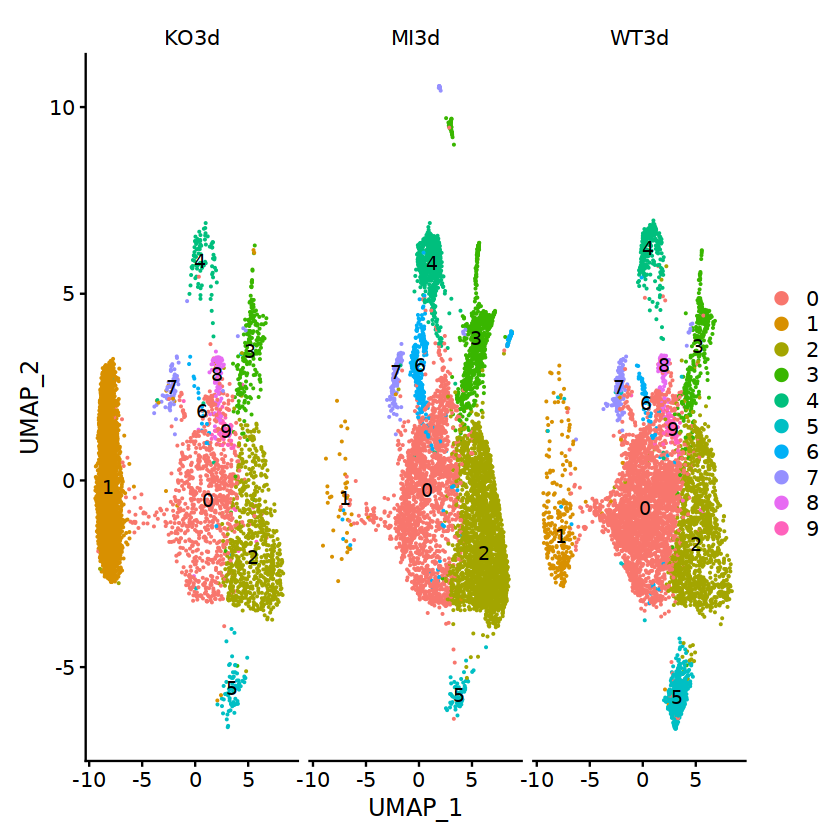

In [12]:
DimPlot(immune.combined, reduction = "umap", split.by = "orig.ident",label =T)

In [22]:
table(immune.combined$orig.ident)


KO3d MI3d WT3d 
6816 6617 6149 

In [14]:
saveRDS(immune.combined,file = 'ko3d.mi3d.wt3d.rds')

In [25]:
Idents(immune.combined) = 'orig.ident'

In [26]:
dds = subset(immune.combined,idents = c('KO3d','WT3d'))

In [27]:
saveRDS(dds,file = 'ko3d.wt3d.cd40.rds')

In [16]:
Idents(immune.combined) = 'seurat_clusters'
DefaultAssay(immune.combined) = 'RNA'


sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [24]:
write.csv(sce.markers,file = 'cd40wt.ko.mi.3sample.csv')

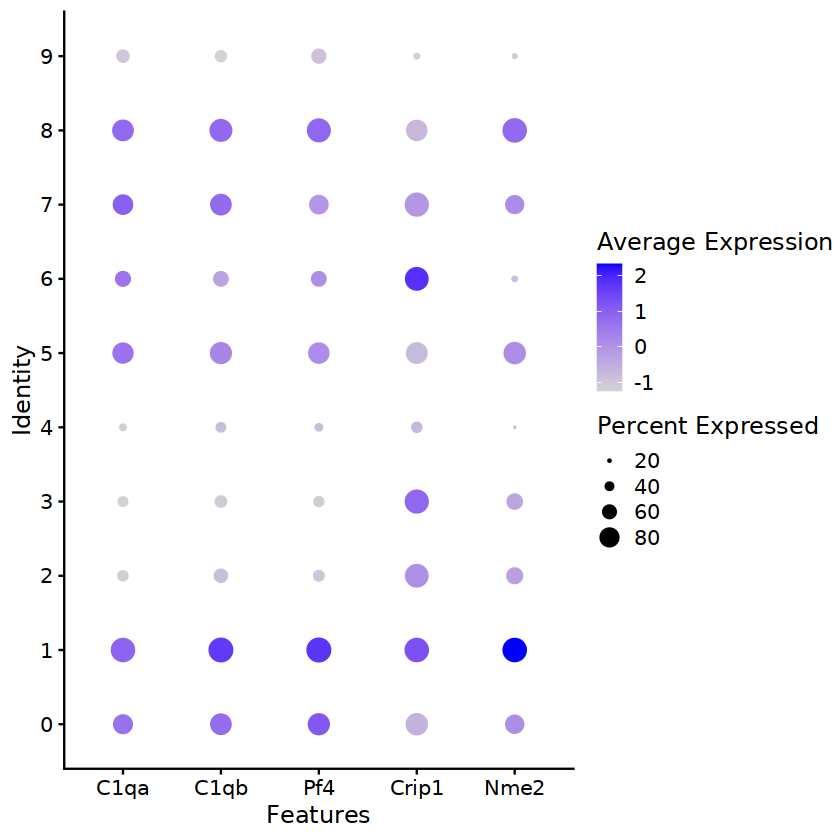

In [17]:
DotPlot(immune.combined,features = c('C1qa','C1qb','Pf4','Crip1','Nme2'))

In [18]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.2.3"


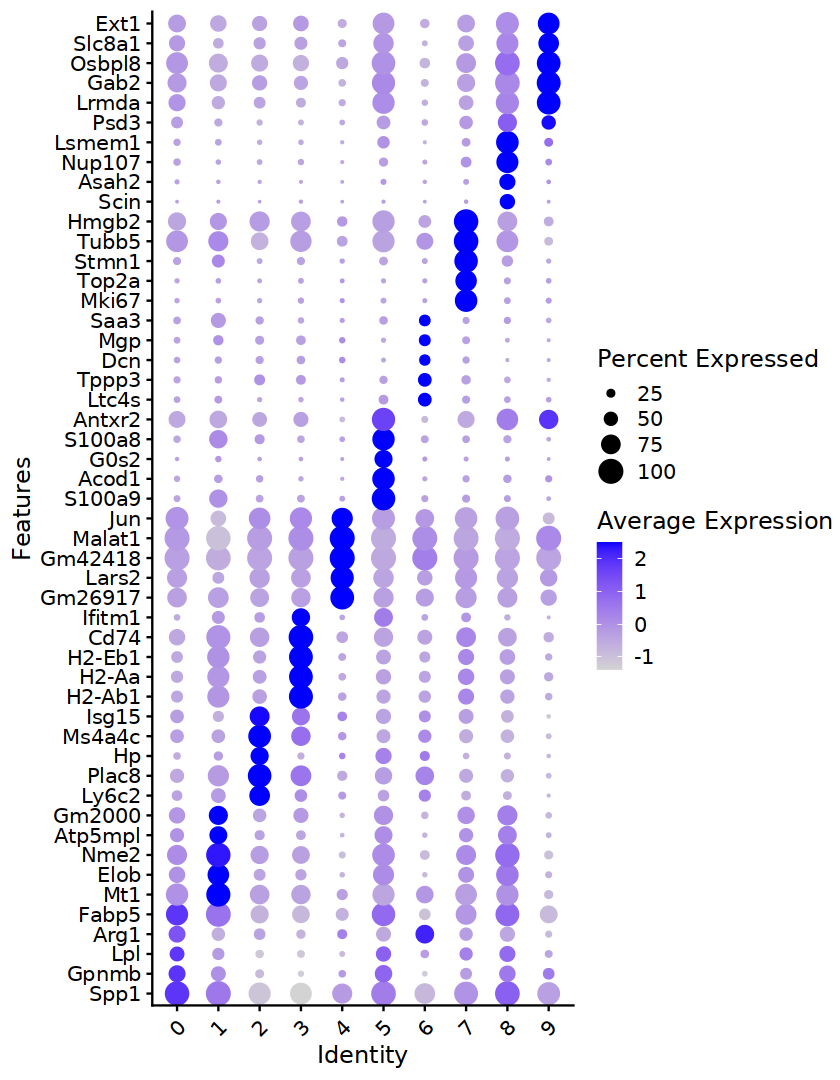

In [19]:
options(repr.plot.height = 9)
# n1 = replace(unique(top5$gene),11:13,c('Cd14','Vcan','Ly6c2'))
# n2 = replace(n1,16:17,c('Spp1','Gpnmb'))
# n3 = replace(n2,40,c('Xcr1'))
DotPlot(immune.combined, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [21]:
sce.markers['Hmox1',]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Hmox1,1.909141e-34,0.7990609,0.915,0.811,6.553891e-30,0,Hmox1


In [30]:
gene = c('Mertk', 'Cd36', 'Lgmn', 'Il1b',unique(top5$gene)[-c(1,2,3,9)])

In [32]:
Idents(immune.combined) = 'seurat_clusters'

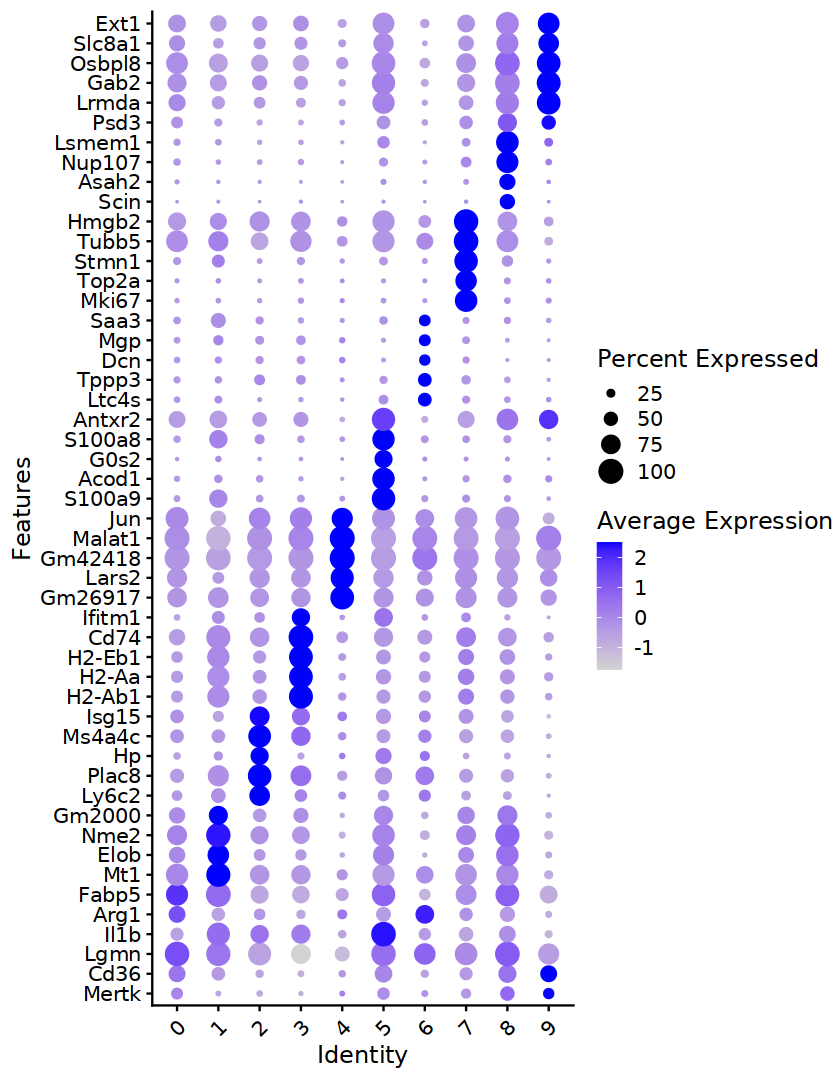

In [33]:
DotPlot(immune.combined, features = gene,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [28]:
unique(top5$gene)

[1] "Spp1"    "Gpnmb"   "Lpl"     "Arg1"    "Fabp5"   "Mt1"     "Elob"   
 [8] "Nme2"    "Atp5mpl" "Gm2000"  "Ly6c2"   "Plac8"   "Hp"      "Ms4a4c" 
[15] "Isg15"   "H2-Ab1"  "H2-Aa"   "H2-Eb1"  "Cd74"    "Ifitm1"  "Gm26917"
[22] "Lars2"   "Gm42418" "Malat1"  "Jun"     "S100a9"  "Acod1"   "G0s2"   
[29] "S100a8"  "Antxr2"  "Ltc4s"   "Tppp3"   "Dcn"     "Mgp"     "Saa3"   
[36] "Mki67"   "Top2a"   "Stmn1"   "Tubb5"   "Hmgb2"   "Scin"    "Asah2"  
[43] "Nup107"  "Lsmem1"  "Psd3"    "Lrmda"   "Gab2"    "Osbpl8"  "Slc8a1" 
[50] "Ext1"

In [34]:
table(immune.combined$orig.ident)


KO3d MI3d WT3d 
6816 6617 6149 

In [35]:
Idents(immune.combined) = 'orig.ident'

In [36]:
scRNA =subset(immune.combined,idents = c('KO3d','WT3d'))


KO3d WT3d 
6816 6149 


          0           1           2           3           4           5 
0.294562283 0.377169302 0.161588893 0.039953722 0.029463941 0.045198612 
          6           7           8           9 
0.006401851 0.017045893 0.015040494 0.013575010 

   
    KO3d WT3d
  0  850 2969
  1 4607  283
  2  738 1357
  3  209  309
  4   92  290
  5   78  508
  6   19   64
  7   65  156
  8   84  111
  9   74  102

Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


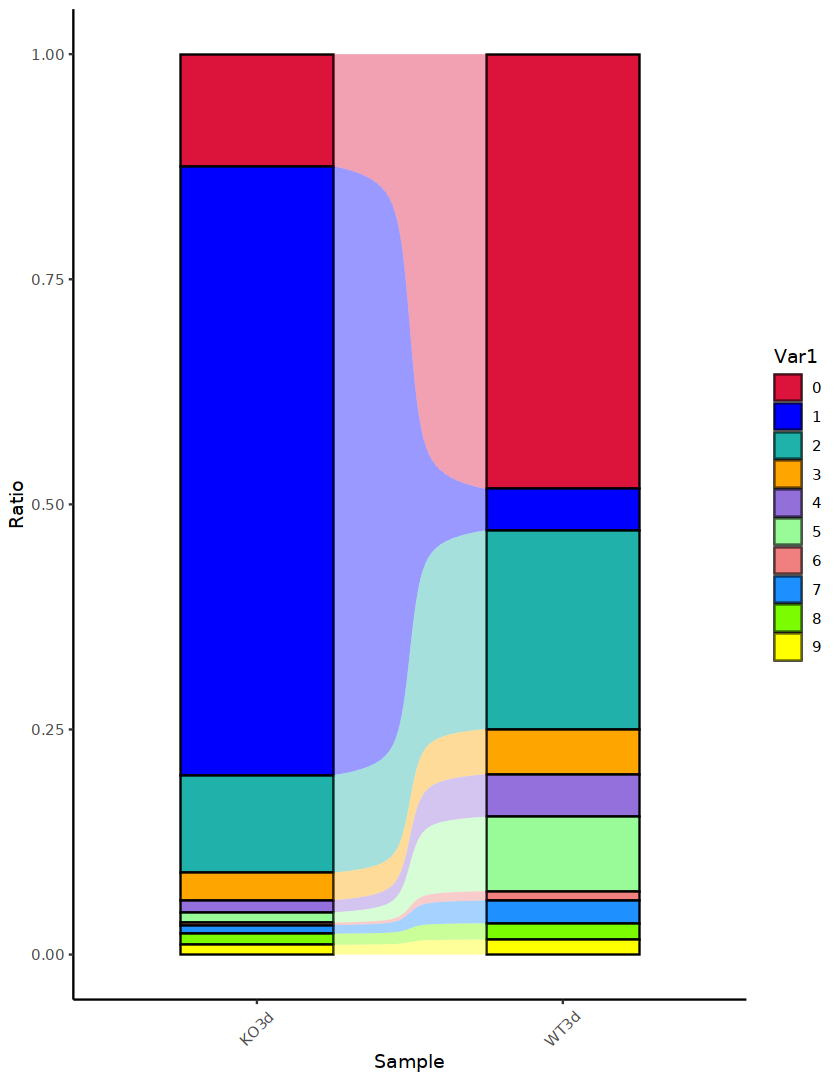

In [37]:
Idents(scRNA) ='seurat_clusters'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'WT3d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [26]:
Idents(immune.combined) = 'seurat_clusters'

In [ ]:
#https://link.springer.com/article/10.1007/s00395-019-0742-1  修复型
# Igf1, Tgfb1, Spp1, and Ptges2 Arg1, Fizz1 and Ym1

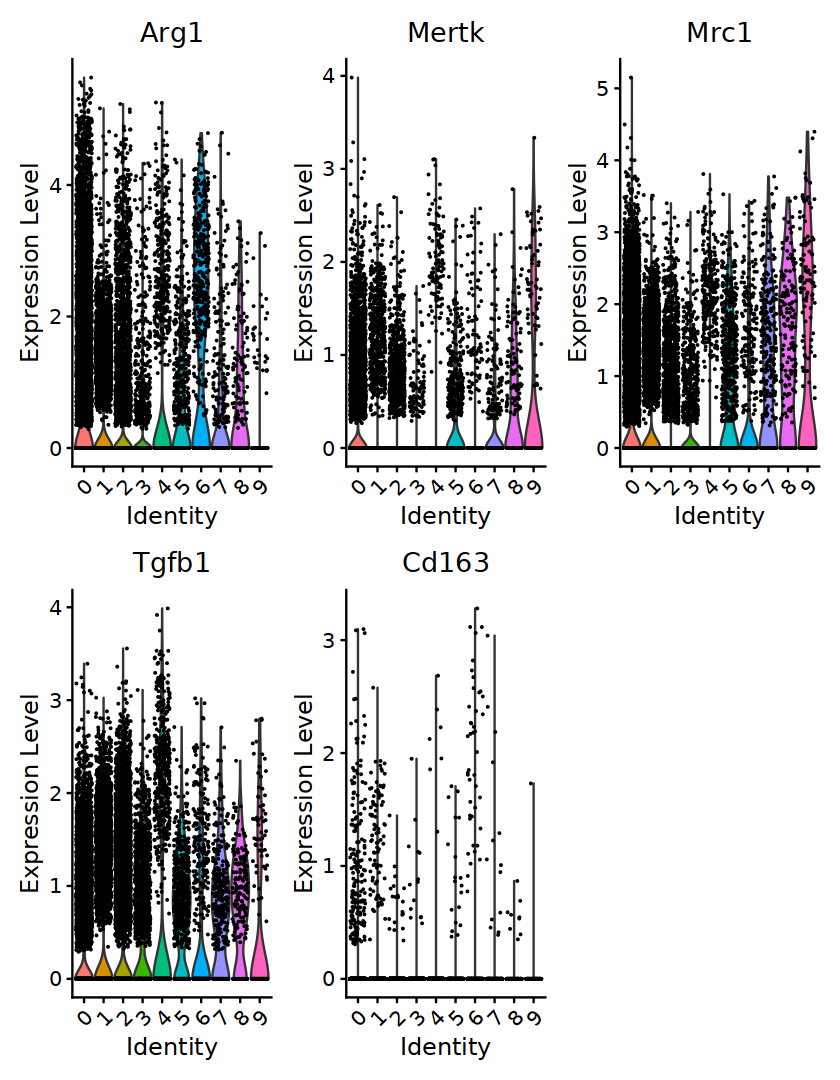

In [64]:
VlnPlot(immune.combined,features = c('Arg1','Mertk','Mrc1','Tgfb1','Cd163')) 

In [53]:
library(homologene)

In [50]:
m1m2 = read.table('./m1m2.txt',header = T,sep = '\t')

In [51]:
head(m1m2,2)

,M1_Polarization,M2_Polarization,Anti_inflammatory,Pro_inflammatory,Proliferation,Hepatic,Immune.surveillance,Immune.escape
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,IL12,ARG1,IL1RN,IL1B,MCM5,ABCB11,HLA-A,CD47
2,IL23,ARG2,IL10,TNF,PCNA,ACOT12,HLA-B,ADAM10


In [55]:
genelist<-m1m2$M2_Polarization
gene = homologene(genelist, inTax = 9606, outTax = 10090)

In [57]:
m2.gene = gene[,2]

In [59]:
feature = list(m2.gene)

In [60]:
sce <- AddModuleScore(immune.combined,
                          features = feature,
                          ctrl = 100,
                          name = 'M2_related')

Warning message:
"The following features are not present in the object: Clec7a, not searching for symbol synonyms"


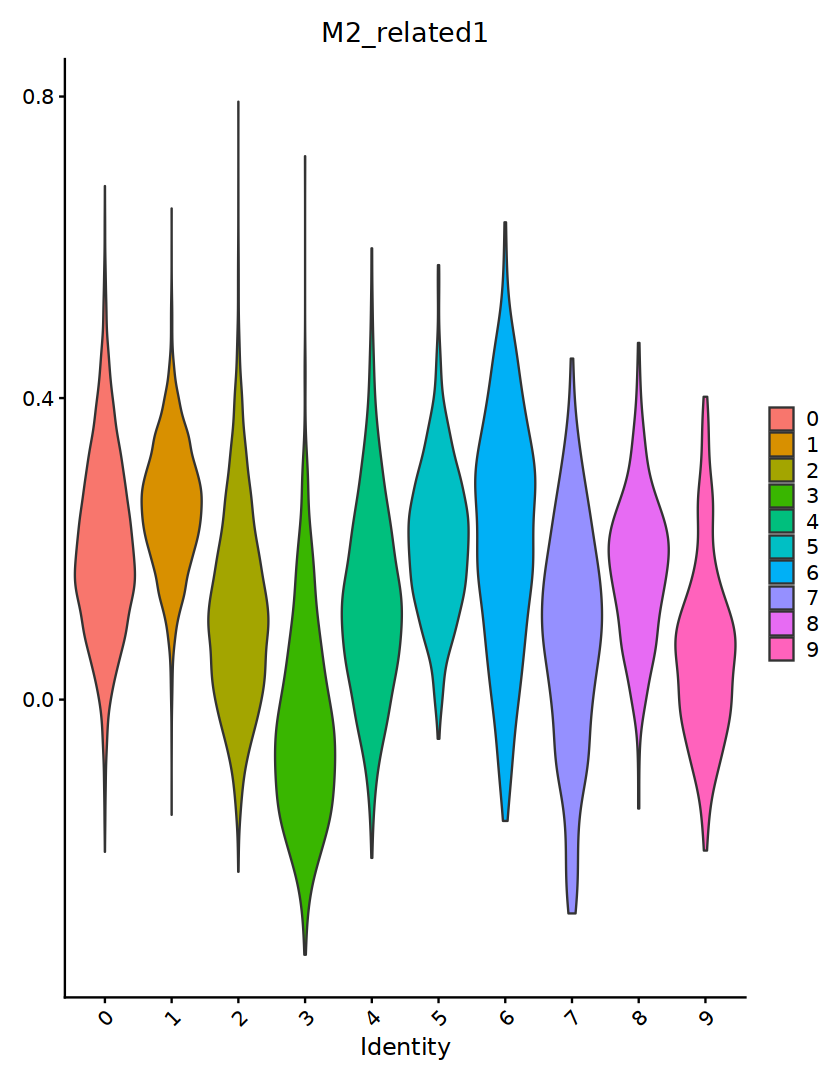

In [67]:
VlnPlot(sce,features = 'M2_related1',pt.size = 0)+ggtitle('M2_related1')

In [65]:
m2.gene

[1] "Arg1"     "Arg2"     "Il10"     "Cd163"    "Cd200r1"  "Pdcd1lg2"
 [7] "Cd274"    "Marco"    "Csf1r"    "Il1rn"    "Il1r2"    "Il4ra"   
[13] "Ccl4"     "Ccl2"     "Ccl20"    "Ccl17"    "Ccl22"    "Ccl24"   
[19] "Lyve1"    "Vegfa"    "Vegfb"    "Vegfc"    "Egf"      "Ctsa"    
[25] "Ctsb"     "Ctsd"     "Tgfb1"    "Tgfb2"    "Tgfb3"    "Mmp14"   
[31] "Mmp19"    "Mmp9"     "Clec7a"   "Wnt7b"    "Tnfsf12"  "Tnfsf8"  
[37] "Cd276"    "Vtcn1"    "Msr1"     "Fn1"      "Irf4"

In [70]:
outdata.c6.gene = read.csv('/import/DB//workdir/cd40/outdata/outsider.diff.gene.csv',row.names = 1)

In [73]:
c6.gene = outdata.c6.gene %>% dplyr::filter(cluster == 6) %>%  rownames()

In [74]:
feature = list(m2.gene)

In [75]:
sce <- AddModuleScore(immune.combined,
                          features = feature,
                          ctrl = 100,
                          name = 'C6_related')

Warning message:
"The following features are not present in the object: Clec7a, not searching for symbol synonyms"


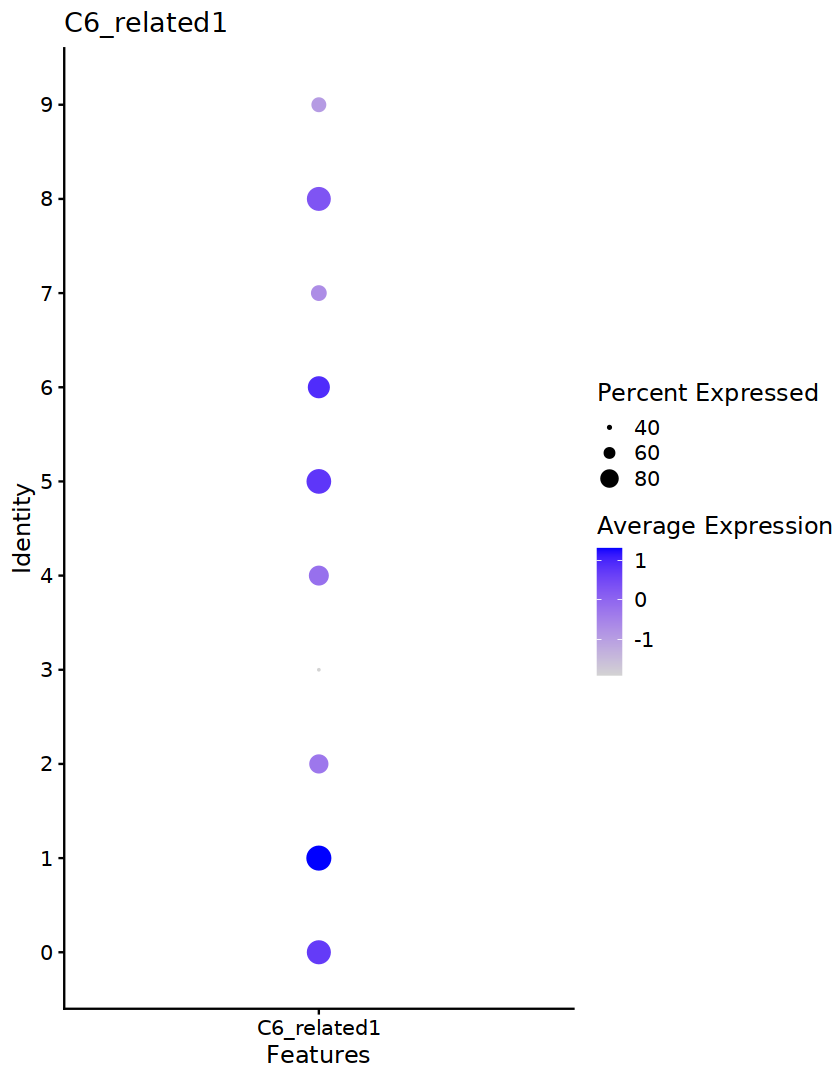

In [77]:
DotPlot(sce,features = 'C6_related1')+ggtitle('C6_related1')

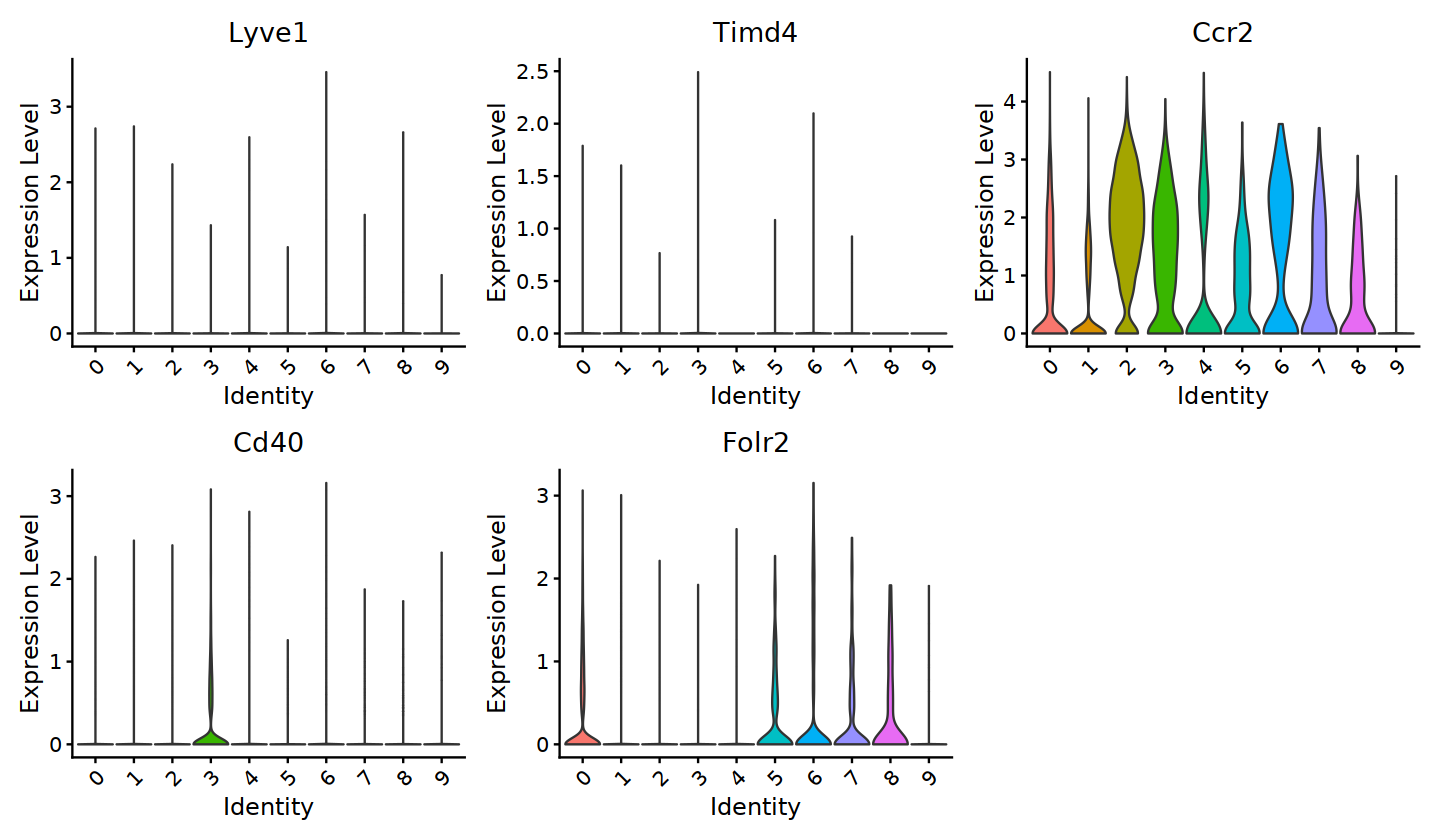

In [46]:
VlnPlot(immune.combined,features = c('Lyve1','Timd4','Ccr2','Cd40','Folr2'),pt.size = 0) 

In [ ]:
scRNA_harmony <- merge(scRNAlist[[1]], y=c(scRNAlist[[2]],scRNAlist[[3]]))

DefaultAssay(scRNA_harmony) = 'RNA'

library(harmony)


scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)

scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.3)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 


options(repr.plot.width = 12)

DimPlot(scRNA_harmony, reduction = "umap", split.by = "orig.ident")